## WWC ML for Social Good Covid-19 Hackathon

### Household Pulse Survey and Mental Health

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns

import boto3
import io
#from sagemaker import get_execution_role
import os
#import sagemaker.amazon.common as smac 
#import sagemaker

In [3]:
# only run when using AWS
role = get_execution_role()

region = boto3.Session().region_name

input_bucket="pythonpings" # Replace with your s3 bucket name
in_data_key = "data.csv"
training_data_location = "s3://{}/{}".format(input_bucket, in_data_key)
#prefix = "sagemaker/pythonpings" # Used as part of the path in the bucket where you store data

In [3]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)
# print full data frame

In [21]:
#week_2_df = pd.read_csv("pulse2020_puf_02.csv")
#week_2_df.shape

# week 1 through I think 6 only have 82 columns. We could work around that.
# but I thought it would be more simple to just choose weeks, spread out, that all
  # have the same column count
# so I uploaded week 7 to the drive and pulled it in here instead of week 2

(41996, 82)

### Importing and Combining Data

In [13]:
week_7_df = pd.read_csv("pulse2020_puf_07.csv")
week_7_df.shape
# import week 7 data

In [14]:
list(week_7_df)

['SCRAM',
 'WEEK',
 'EST_ST',
 'EST_MSA',
 'PWEIGHT',
 'TBIRTH_YEAR',
 'ABIRTH_YEAR',
 'EGENDER',
 'AGENDER',
 'RHISPANIC',
 'AHISPANIC',
 'RRACE',
 'ARACE',
 'EEDUC',
 'AEDUC',
 'MS',
 'THHLD_NUMPER',
 'AHHLD_NUMPER',
 'THHLD_NUMKID',
 'AHHLD_NUMKID',
 'THHLD_NUMADLT',
 'WRKLOSS',
 'EXPCTLOSS',
 'ANYWORK',
 'KINDWORK',
 'RSNNOWRK',
 'UNEMPPAY',
 'EIP',
 'EIPSPND1',
 'EIPSPND2',
 'EIPSPND3',
 'EIPSPND4',
 'EIPSPND5',
 'EIPSPND6',
 'EIPSPND7',
 'EIPSPND8',
 'EIPSPND9',
 'EIPSPND10',
 'EIPSPND11',
 'EIPSPND12',
 'EIPSPND13',
 'SPNDSRC1',
 'SPNDSRC2',
 'SPNDSRC3',
 'SPNDSRC4',
 'SPNDSRC5',
 'SPNDSRC6',
 'SPNDSRC7',
 'PRIFOODSUF',
 'CURFOODSUF',
 'CHILDFOOD',
 'FOODSUFRSN1',
 'FOODSUFRSN2',
 'FOODSUFRSN3',
 'FOODSUFRSN4',
 'FOODSUFRSN5',
 'FREEFOOD',
 'WHEREFREE1',
 'WHEREFREE2',
 'WHEREFREE3',
 'WHEREFREE4',
 'WHEREFREE5',
 'WHEREFREE6',
 'WHEREFREE7',
 'TSPNDFOOD',
 'TSPNDPRPD',
 'FOODCONF',
 'HLTHSTATUS',
 'ANXIOUS',
 'WORRY',
 'INTEREST',
 'DOWN',
 'HLTHINS1',
 'HLTHINS2',
 'HLTHINS3',

In [4]:
week_9_df = pd.read_csv("pulse2020_puf_09.csv")
week_9_df.shape
# import week 9 data

(98663, 105)

In [5]:
week_12_df = pd.read_csv("pulse2020_puf_12.csv")
week_12_df.shape
# import week 12 data

(86792, 105)

In [6]:
data1 = week_7_df.append(week_9_df)
data1.shape
# stack week 7 and week 9 data frames and view shape
# can use concat function as well

(172135, 105)

In [7]:
data = data1.append(week_12_df)
data.shape
# stack data1 and week 12 data frames and view shape


(258927, 105)

In [ ]:
data.to_csv("data.csv")
# save new combined data frame in a csv
# this can be pulled into AWS for the model(s)

In [6]:
# for AWS usage
#data = pd.read_csv(training_data_location)
#data = pd.read_csv("data.csv") 

### EDA and Preprocessing of Data

In [7]:
data.head(10)
# glimpse of data frame, first 10 rows

Unnamed: 0                      SCRAM  WEEK  EST_ST  EST_MSA       PWEIGHT  \
0  0           V050000004S70040487000121  7     42      37980.0  11169.979425   
1  1           V050000005S70050847100111  7     5      NaN       2323.963314    
2  2           V050000008S96080333010111  7     6      NaN       14594.211515   
3  3           V050010002S75120726500111  7     12     NaN       10588.543683   
4  4           V050010005S30150638500111  7     15     NaN       508.324240     
5  5           V050010006S72160696700121  7     16     NaN       1131.826329    
6  6           V050010062M32132513710111  7     13      12060.0  13493.172313   
7  7           V050010062M76130638400121  7     13      12060.0  17676.732201   
8  8           V050010062M98130108500111  7     13      12060.0  7486.021100    
9  9           V050010062M98130502600111  7     13      12060.0  5973.805125    

   TBIRTH_YEAR  ABIRTH_YEAR  EGENDER  AGENDER  RHISPANIC  AHISPANIC  RRACE  \
0  1990         2            1        2        1          2          1       
1  1976         2            2        2        1          2          1       
2  1990         2            1        2        1          2          1       
3  1951         2            2        2        1          2          1       
4  1943         2            1        2        1          2          1       
5  1941         2            2        2        1          2          1       
6  1961         2            2        2        1          2          2       
7  1981         2            1        2        1          2          2       
8  1947         2            1        2        1          2          1       
9  1978         2            2        2        1          2          1       

   ARACE  EEDUC  AEDUC  MS  THHLD_NUMPER  AHHLD_NUMPER  THHLD_NUMKID  \
0  2      7      2      5   2             2             0              
1  2      6      2      1   4             2             2              
2  2      7      2      5   2             2             0              
3  2      6      2      3   1             2             0              
4  2      6      2      5   1             2             0              
5  2      5      2      3   1             2             0              
6  2      6      2      1   3             2             0              
7  2      7      2      1   3             2             1              
8  2      6      2      1   2             2             0              
9  2      6      2      1   4             2             2              

   AHHLD_NUMKID  THHLD_NUMADLT  WRKLOSS  EXPCTLOSS  ANYWORK  KINDWORK  \
0  2             2              2        1          1        1          
1  2             2              2        2          1        2          
2  2             2              2        2          1        2          
3  2             1              1        2          1        3          
4  2             1              2        2          2       -88         
5  2             1              2        2          2       -88         
6  2             3              2        2          2       -88         
7  2             2              2        2          1        2          
8  2             2              2        2          1        2          
9  2             2              1        1          1        3          

   RSNNOWRK  UNEMPPAY  EIP  EIPSPND1  EIPSPND2  EIPSPND3  EIPSPND4  EIPSPND5  \
0 -88       -88        1    1         1         1        -99       -99         
1 -88       -88        3   -99       -99       -99       -99       -99         
2 -88       -88        4   -88       -88       -88       -88       -88         
3 -88       -88        2   -99       -99       -99       -99       -99         
4  7         4         4   -88       -88       -88       -88       -88         
5  7         4         3    1        -99        1        -99       -99         
6  7         4         1    1        -99       -99       -99       -99         
7 -88       -88

In [8]:
data.shape

(258927, 106)

In [55]:
data.isnull().sum()
# 179962/258927 nas in column est_msa = metropolitan statistical area zipcode
  # drop est-msa due to the high percentage of missing values
# -99 means seen but category not selected, will convert to 0 for our purposes
# -88 means missing, did not report, will convert to 0
# not reported or not selected can mean/relay a lot especially in surveys (bias) 
  # but we are not focusing on that in this project 

SCRAM            0     
WEEK             0     
EST_ST           0     
EST_MSA          179962
PWEIGHT          0     
TBIRTH_YEAR      0     
ABIRTH_YEAR      0     
EGENDER          0     
AGENDER          0     
RHISPANIC        0     
AHISPANIC        0     
RRACE            0     
ARACE            0     
EEDUC            0     
AEDUC            0     
MS               0     
THHLD_NUMPER     0     
AHHLD_NUMPER     0     
THHLD_NUMKID     0     
AHHLD_NUMKID     0     
THHLD_NUMADLT    0     
WRKLOSS          0     
EXPCTLOSS        0     
ANYWORK          0     
KINDWORK         0     
RSNNOWRK         0     
UNEMPPAY         0     
EIP              0     
EIPSPND1         0     
EIPSPND2         0     
EIPSPND3         0     
EIPSPND4         0     
EIPSPND5         0     
EIPSPND6         0     
EIPSPND7         0     
EIPSPND8         0     
EIPSPND9         0     
EIPSPND10        0     
EIPSPND11        0     
EIPSPND12        0     
EIPSPND13        0     
SPNDSRC1        

In [9]:
data.drop(["SCRAM","PWEIGHT","EST_MSA","WEEK","ABIRTH_YEAR",
           "AGENDER", "AHISPANIC", "ARACE", "AEDUC", "AHHLD_NUMPER",
           "AHHLD_NUMKID"], axis=1, inplace=True)
# drop initial unwanted columns

In [10]:
data.drop(["THHLD_NUMADLT","KINDWORK","PRIFOODSUF","FOODSUFRSN1","FOODSUFRSN2",
           "FOODSUFRSN3", "FOODSUFRSN4", "FOODSUFRSN5", "SPNDSRC1","SPNDSRC2","SPNDSRC3",
           "SPNDSRC4","SPNDSRC5","SPNDSRC6", "SPNDSRC7", "PRIFOODSUF",
           "WHEREFREE1", "WHEREFREE2", "WHEREFREE3", "WHEREFREE4", "WHEREFREE5", "WHEREFREE6",
           "WHEREFREE7", "HLTHINS1", "HLTHINS2","HLTHINS3","HLTHINS4","HLTHINS5","HLTHINS6",
           "HLTHINS7", "HLTHINS8", "NOTGET", "ENROLL1", "ENROLL2", 
           "ENROLL3", "TEACH1", "TEACH2","TEACH3","TEACH4","TEACH5","COMP1",
           "COMP2", "COMP3", "INTRNT1","INTRNT2","INTRNT3","EST_ST", "EIPSPND1", "EIPSPND2",
           "EIPSPND3", "EIPSPND4", "EIPSPND5", "EIPSPND6",
           "EIPSPND7", "EIPSPND8", "EIPSPND9", "EIPSPND10",
           "EIPSPND11", "EIPSPND12", "EIPSPND13",], axis=1, inplace=True)
# dropping unwanted columns, selected by instinct and problem statement irrelevancy

In [11]:
data.drop(data.columns[0], axis=1, inplace=True)

In [12]:
data.shape

(258927, 35)

In [13]:
data.head(10)

TBIRTH_YEAR  EGENDER  RHISPANIC  RRACE  EEDUC  MS  THHLD_NUMPER  \
0  1990         1        1          1      7      5   2              
1  1976         2        1          1      6      1   4              
2  1990         1        1          1      7      5   2              
3  1951         2        1          1      6      3   1              
4  1943         1        1          1      6      5   1              
5  1941         2        1          1      5      3   1              
6  1961         2        1          2      6      1   3              
7  1981         1        1          2      7      1   3              
8  1947         1        1          1      6      1   2              
9  1978         2        1          1      6      1   4              

   THHLD_NUMKID  WRKLOSS  EXPCTLOSS  ANYWORK  RSNNOWRK  UNEMPPAY  EIP  \
0  0             2        1          1       -88       -88        1     
1  2             2        2          1       -88       -88        3     
2  0             2        2          1       -88       -88        4     
3  0             1        2          1       -88       -88        2     
4  0             2        2          2        7         4         4     
5  0             2        2          2        7         4         3     
6  0             2        2          2        7         4         1     
7  1             2        2          1       -88       -88        1     
8  0             2        2          1       -88       -88        4     
9  2             1        1          1       -88       -88        4     

   CURFOODSUF  CHILDFOOD  FREEFOOD  TSPNDFOOD  TSPNDPRPD  FOODCONF  \
0  2          -88         2         500        100        2          
1  1          -88         2         100        75         4          
2  1          -88         2         300        200        4          
3  2          -88         2         204        15         2          
4  1          -88         2         125        0          4          
5  2          -88         2         0          60         3          
6  1          -88         2         50         150        4          
7  1          -88         2         50         75         4          
8  1          -88         2         200        0          4          
9  1          -88         2         300        200        4          

   HLTHSTATUS  ANXIOUS  WORRY  INTEREST  DOWN  DELAY  TENURE  MORTLMTH  \
0  2           2        2      2         1     1      1      -88         
1  3           1        1      1         2     2      2       1          
2  3           4        4      4         4     1      3       1          
3  3           1        1      1         1     2      2       1          
4  3           1        1      1         1     2      1      -88         
5  4           2        2      2         2     1      2       1          
6  2           1        1      1         1     2      1      -88         
7  2           2        1      1         1     2      2       1          
8  3           1        1      2         1     1      1      -88         
9  1           2        2      1         2     2      2       1          

   MORTCONF  COMPAVAIL  INTRNTAVAIL  TSCHLHRS  TSTDY_HRS  TTCH_HRS  INCOME  
0 -88       -88        -88          -88.0     -88.0      -88.0      5       
1  4        -88        -88          -88.0     -88.0      -88.0      3       
2  4        -88        -88          -88.0     -88.0      -88.0      8       
3  4        -88        -88          -88.0     -88.0      -88.0      4       
4 -88       -88        -88          -88.0     -88.0      -88.0      5       
5  3        -88        -88          -88.0     -88.0      -88.0      1       
6 -88       -88        -88          -88.0     -88.0      -88.0      4       
7  4        -88        -88          -88.0     -88.0      -88.0      8       
8 -88       -88        -88          -88.0     -88.0      -88.0      6       
9  4         1          1            0.0       0.0        0.0       8

In [14]:
data.columns = data.columns.str.lower()
# convert column names into lower case

In [15]:
data.tail(10)

tbirth_year  egender  rhispanic  rrace  eeduc  ms  thhld_numper  \
258917  1990         1        1          1      4      5   2              
258918  1991         1        1          1      6      5   2              
258919  1948         2        1          1      4      1   3              
258920  2001         2        1          1      4      5   4              
258921  1957         2        2          1      3      5   3              
258922  1999         1        1          1      3      5   4              
258923  1959         2        1          4      7      3   1              
258924  1958         2        1          1      4      3   1              
258925  1966         1        1          1      4      3   1              
258926  1974         1        1          1      5      3   1              

        thhld_numkid  wrkloss  expctloss  anywork  rsnnowrk  unemppay  eip  \
258917  0             1        1          1       -88       -88        4     
258918  0             1        1          2        9         4         1     
258919  0             2        2          1       -88       -88        2     
258920  1             2        2          1       -88       -88        4     
258921  0             1        1          2        7         4         1     
258922  0             2        2          1       -88       -88        1     
258923  0             2        2          1       -88       -88        2     
258924  0             2        2          1       -88       -88        1     
258925  0             2        1          1       -88       -88        1     
258926  0             1        1          1       -88       -88        2     

        curfoodsuf  childfood  freefood  tspndfood  tspndprpd  foodconf  \
258917  2          -88         2         300        100        3          
258918  2          -88         2         300        75         2          
258919  2          -88         2         0          0          3          
258920  1          -88         2         200        300        4          
258921  2          -88         2        -88        -88        -88         
258922  1          -88         2         400        50         2          
258923  1          -88        -88       -88        -88        -88         
258924  2          -88         2        -88        -88        -88         
258925  2          -88         2         500        200        2          
258926  2          -88         2         500        50         2          

        hlthstatus  anxious  worry  interest  down  delay  tenure  mortlmth  \
258917  3           4        2      2         2     2      2       3          
258918  2           4        3      1         1     1      3       1          
258919  3           2        2      2         2     2      1      -88         
258920  1           2        3      2         3     2      1      -88         
258921 -88         -88      -88    -88       -88   -88    -88     -88         
258922  4           1        1      1         1     2      3       1          
258923 -88         -88      -88    -88       -88   -88    -88     -88         
258924 -88         -88      -88    -88       -88   -88    -88     -88         
258925  2           2        2      2         1     1      3       1          
258926  2           2        2      3         2     2      3       2          

        mortconf  compavail  intrntavail  tschlhrs  tstdy_hrs  ttch_hrs  \
258917  5        -88        -88          -88.0     -88.0      -88.0       
258918  3        -88        -88          -88.0     -88.0      -88.0       
258919 -88       -88        -88          -88.0     -88.0      -88.0       
258920 -88        3          2            0.0       20.0       0.0        
258921 -88       -88        -88          -88.0     -88.0      -88.0       
258922  4        -88        -88          -88.0     -88.0      -88.0       
258923 -88       -88        -88          -88.0     -88.0      -88.0       
258924 -88       -88       

In [55]:
data.dtypes
# some of our columns are ordinal like worry and anxious. the answers are on a scale, order matters. 
# a few are open ended survey questions and continuous integers like tspndfood and tspndprpd
# some are nominal variables like race and hlthins1: discrete with no relationhip between categories. 
  # we may want to one hot encode those
# most of our columns are truly categorical but have been converted to numerical
# most ML algorithms take numerical input 
# https://machinelearningmastery.com/one-hot-encoding-for-categorical-data/ 

tbirth_year     int64  
egender         int64  
rhispanic       int64  
rrace           int64  
eeduc           int64  
ms              int64  
thhld_numper    int64  
thhld_numkid    int64  
wrkloss         int64  
expctloss       int64  
anywork         int64  
rsnnowrk        int64  
unemppay        int64  
eip             int64  
curfoodsuf      int64  
childfood       int64  
freefood        int64  
tspndfood       int64  
tspndprpd       int64  
foodconf        int64  
hlthstatus      int64  
anxious         int64  
worry           int64  
interest        int64  
down            int64  
delay           int64  
tenure          int64  
mortlmth        int64  
mortconf        int64  
compavail       int64  
intrntavail     int64  
tschlhrs        float64
tstdy_hrs       float64
ttch_hrs        float64
income          int64  
dtype: object

In [27]:
#data.info

In [16]:
data.describe()

tbirth_year        egender      rhispanic          rrace  \
count  258927.000000  258927.000000  258927.000000  258927.000000   
mean   1968.312725    1.597605       1.089346       1.320237        
std    15.738472      0.490382       0.285243       0.776864        
min    1932.000000    1.000000       1.000000       1.000000        
25%    1956.000000    1.000000       1.000000       1.000000        
50%    1968.000000    2.000000       1.000000       1.000000        
75%    1981.000000    2.000000       1.000000       1.000000        
max    2002.000000    2.000000       2.000000       4.000000        

               eeduc             ms   thhld_numper   thhld_numkid  \
count  258927.000000  258927.000000  258927.000000  258927.000000   
mean   5.268697       1.471191       2.859825       0.664098        
std    1.465777       8.738286       1.633476       1.064646        
min    1.000000      -99.000000      1.000000       0.000000        
25%    4.000000       1.000000       2.000000       0.000000        
50%    6.000000       1.000000       2.000000       0.000000        
75%    7.000000       3.000000       4.000000       1.000000        
max    7.000000       5.000000       10.000000      5.000000        

             wrkloss     expctloss        anywork       rsnnowrk  \
count  258927.000000  258927.00000  258927.000000  258927.000000   
mean   1.081710       1.10401       0.916834      -47.660978       
std    7.197131       7.92325       7.150278       47.422667       
min   -99.000000     -99.00000     -99.000000     -99.000000       
25%    1.000000       1.00000       1.000000      -88.000000       
50%    2.000000       2.00000       1.000000      -88.000000       
75%    2.000000       2.00000       2.000000       7.000000        
max    2.000000       2.00000       2.000000       13.000000       

            unemppay            eip     curfoodsuf      childfood  \
count  258927.000000  258927.000000  258927.000000  258927.000000   
mean  -52.039297      0.976445      -0.466633      -75.822448       
std    45.176721      9.772664       13.183004      30.943486       
min   -99.000000     -99.000000     -99.000000     -99.000000       
25%   -88.000000      1.000000       1.000000      -88.000000       
50%   -88.000000      1.000000       1.000000      -88.000000       
75%    4.000000       3.000000       2.000000      -88.000000       
max    4.000000       4.000000       4.000000       3.000000        

            freefood      tspndfood      tspndprpd       foodconf  \
count  258927.000000  258927.000000  258927.000000  258927.000000   
mean  -0.267326       173.536684     56.271250     -2.892398        
std    14.136713      156.192296     97.461736      22.935388       
min   -99.000000     -99.000000     -99.000000     -99.000000       
25%    2.000000       100.000000     0.000000       2.000000        
50%    2.000000       150.000000     40.000000      4.000000        
75%    2.000000       250.000000     100.000000     4.000000        
max    2.000000       900.000000     500.000000     4.000000        

          hlthstatus        anxious          worry       interest  \
count  258927.000000  258927.000000  258927.000000  258927.000000   
mean  -4.787824      -5.149718      -5.412719      -5.564313        
std    24.606096      24.705489      24.735759      24.798071       
min   -99.000000     -99.000000     -99.000000     -99.000000       
25%    1.000000       1.000000       1.000000       1.000000        
50%    2.000000       2.000000       2.000000       1.000000        
75%    3.000000       3.000000       2.000000       2.000000        
max    5.000000       4.000000       4.000000       4.000000        

                down          delay         tenure       mortlmth  \
count  258927.000000  258927.000000  258927.000000  258927.000000   
mean  -5.520050      -6.824062      -6.630996      -27.716148       
std    24.673104      26.209266      26.681957      41.731030       
min   -99.

In [17]:
d = {-88:0,-99:0}
data = data.replace(d)
# one way to handle "missing" data above for example
# replacing missing data with 0 is most often not the right answer. But since
  # -99 means the option was not selected when the question states to select all that apply, 
    # it would make sense here. The -88 is labeled by the authors as missing and they replaced
    # missing with -88.

# we will discuss how we want to proceed with this, depending on ML model as well
# some questions had "choose all that apply" options, for that the authors 
  # made a column for each option. There is a 1 if they selected it, 2 if they selected no and and a -99
  # in other answer options that the survey responder did not choose
# they made nominal data into integers which have no particular order/ranking

In [18]:
data.columns

Index(['tbirth_year', 'egender', 'rhispanic', 'rrace', 'eeduc', 'ms',
       'thhld_numper', 'thhld_numkid', 'wrkloss', 'expctloss', 'anywork',
       'rsnnowrk', 'unemppay', 'eip', 'curfoodsuf', 'childfood', 'freefood',
       'tspndfood', 'tspndprpd', 'foodconf', 'hlthstatus', 'anxious', 'worry',
       'interest', 'down', 'delay', 'tenure', 'mortlmth', 'mortconf',
       'compavail', 'intrntavail', 'tschlhrs', 'tstdy_hrs', 'ttch_hrs',
       'income'],
      dtype='object')

In [19]:
for col in ["egender","rhispanic", "rrace", "ms", "thhld_numper", 
            "thhld_numkid", "wrkloss", "expctloss", "eip", 
            "anywork", "rsnnowrk", "unemppay", "mortlmth", "tenure",
            "delay", "freefood"]:
    data[col] = data[col].astype("category")
    
# make nominal numerical columns into categorical in prep for one-hot

In [20]:
data.dtypes

tbirth_year     int64   
egender         category
rhispanic       category
rrace           category
eeduc           int64   
ms              category
thhld_numper    category
thhld_numkid    category
wrkloss         category
expctloss       category
anywork         category
rsnnowrk        category
unemppay        category
eip             category
curfoodsuf      int64   
childfood       int64   
freefood        category
tspndfood       int64   
tspndprpd       int64   
foodconf        int64   
hlthstatus      int64   
anxious         int64   
worry           int64   
interest        int64   
down            int64   
delay           category
tenure          category
mortlmth        category
mortconf        int64   
compavail       int64   
intrntavail     int64   
tschlhrs        float64 
tstdy_hrs       float64 
ttch_hrs        float64 
income          int64   
dtype: object

In [21]:
data["tbirth_year"] = pd.Timestamp("now").year - data["tbirth_year"] 
# convert birth year to age

In [22]:
data["tbirth_year"]

0         30
1         44
2         30
3         69
4         77
5         79
6         59
7         39
8         73
9         42
10        60
11        74
12        72
13        67
14        43
15        65
16        78
17        65
18        67
19        77
20        67
21        39
22        62
23        78
24        68
25        65
26        33
27        73
28        56
29        36
30        52
31        71
32        63
33        77
34        75
35        70
36        38
37        60
38        52
39        78
40        30
41        46
42        75
43        61
44        64
45        32
46        45
47        46
48        67
49        37
50        45
51        38
52        49
53        53
54        68
55        69
56        64
57        45
58        78
59        83
60        73
61        62
62        31
63        76
64        66
65        36
66        50
67        43
68        51
69        63
70        37
71        76
72        47
73        55
74        44
75        52
76        40

In [23]:
bins = [0, 18, 25, 35, 45, 55, 65, np.inf]
names = ["0-18", "18-25", "25-35", "35-45", "45-55", "55-65", "65+"]

data["age_range"] = pd.cut(data["tbirth_year"], bins, labels=names)

print(data.dtypes)
# bin tbirth_year and convert into age_range column and to categorical

tbirth_year     int64   
egender         category
rhispanic       category
rrace           category
eeduc           int64   
ms              category
thhld_numper    category
thhld_numkid    category
wrkloss         category
expctloss       category
anywork         category
rsnnowrk        category
unemppay        category
eip             category
curfoodsuf      int64   
childfood       int64   
freefood        category
tspndfood       int64   
tspndprpd       int64   
foodconf        int64   
hlthstatus      int64   
anxious         int64   
worry           int64   
interest        int64   
down            int64   
delay           category
tenure          category
mortlmth        category
mortconf        int64   
compavail       int64   
intrntavail     int64   
tschlhrs        float64 
tstdy_hrs       float64 
ttch_hrs        float64 
income          int64   
age_range       category
dtype: object


In [24]:
data["age_range"].value_counts()

65+      58548
55-65    53229
35-45    51442
45-55    48622
25-35    36626
18-25    9852 
0-18     608  
Name: age_range, dtype: int64

In [25]:
data.drop(["tbirth_year"], axis=1, inplace=True)
# drop tbirth_year column

In [69]:
data.dtypes

egender         category
rhispanic       category
rrace           category
eeduc           int64   
ms              category
thhld_numper    category
thhld_numkid    category
wrkloss         category
expctloss       category
anywork         category
rsnnowrk        category
unemppay        category
eip             category
curfoodsuf      int64   
childfood       int64   
freefood        category
tspndfood       int64   
tspndprpd       int64   
foodconf        int64   
hlthstatus      int64   
anxious         int64   
worry           int64   
interest        int64   
down            int64   
delay           category
tenure          category
mortlmth        category
mortconf        int64   
compavail       int64   
intrntavail     int64   
tschlhrs        float64 
tstdy_hrs       float64 
ttch_hrs        float64 
income          int64   
age_range       category
dtype: object

In [70]:
pd.crosstab(data.eeduc,data.anxious)
# we may see the anxiety go up as the education level goes up

anxious     0      1      2     3      4
eeduc                                   
1        240   436    419    218   336  
2        624   1003   1129   512   739  
3        3250  9367   8903   3985  4927 
4        5023  15889  17374  7574  9981 
5        2209  8123   8656   3647  4511 
6        5387  23642  25405  9159  11216
7        4058  21607  23083  7529  8766

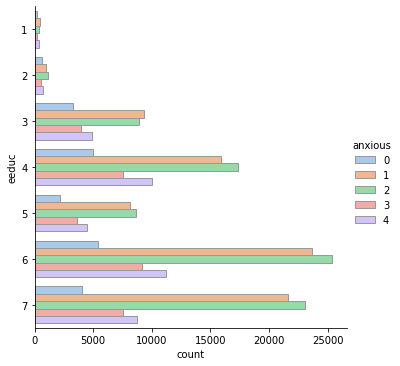

In [19]:
sns.catplot(y="eeduc", hue="anxious", kind="count",
            palette="pastel", edgecolor=".6",
            data=data);

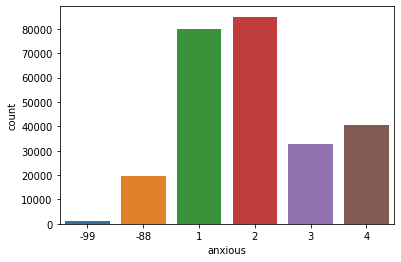

In [106]:
sns.countplot(data["anxious"]);
# view the count in each category of the anxious column
# this column is ordinal as the numbers are in a scale (ordered) from not anxious 1
  # to is anxious 4

In [123]:
data["anxious"].value_counts()
# 1 is not at all
# 2 is several days
# 3 is more than half the days
# 4 is nearly every day

 2     84969
 1     80067
 4     40476
 3     32624
-88    19557
-99    1234 
Name: anxious, dtype: int64

In [133]:
data.loc[data["worry"] == 4, :].head(10)
# looks at rows only where worry is a 4. 
# can check out other attributes that go along with the 4 (per individual)
# note: just glancing here, the worry 4s go alongside anxious and interest 4s

week  est_st  est_msa  tbirth_year  abirth_year  egender  agender  \
2    7     6      NaN       1990         2            1        2         
27   7     12      33100.0  1947         2            2        2         
45   7     51     NaN       1988         2            1        2         
51   7     53      42660.0  1982         2            1        2         
61   7     12     NaN       1958         2            1        2         
77   7     21     NaN       1958         2            2        2         
85   7     26     NaN       1978         2            2        2         
101  7     35     NaN       1954         2            1        2         
111  7     36      35620.0  1954         2            2        2         
117  7     41     NaN       1956         2            1        2         

     rhispanic  ahispanic  rrace  arace  eeduc  aeduc  ms  thhld_numper  \
2    1          2          1      2      7      2      5   2              
27   1          2          1      2      5      2      3   1              
45   1          2          2      2      4      2      5   4              
51   1          2          1      2      7      2      5   1              
61   1          2          1      2      4      2      1   3              
77   1          2          1      2      3      2      1   2              
85   1          2          1      2      5      2      1   4              
101  1          2          4      2      6      2      3   1              
111  2          2          1      2      6      2      1   2              
117  1          2          1      2      4      2      3   1              

     ahhld_numper  thhld_numkid  ahhld_numkid  thhld_numadlt  wrkloss  \
2    2             0             2             2              2         
27   2             0             2             1              2         
45   2             2             2             2              1         
51   2             0             2             1              2         
61   2             0             2             3              1         
77   2             0             2             2              2         
85   2             2             2             2              1         
101  2             0             2             1              2         
111  2             0             2             2              2         
117  2             0             2             1              2         

     expctloss  anywork  kindwork  rsnnowrk  unemppay  eip  eipspnd1  \
2    2          1        2        -88       -88        4   -88         
27   2          2       -88        7         4         1    1          
45   2          2       -88        11        4         1    1          
51   2          1        1        -88       -88        3   -99         
61   2          1        1        -88       -88        2   -99         
77   2          2       -88        10        2         1    1          
85   1          1        2        -88       -88        1    1          
101  2          2       -88        6         4         1    1          
111  1          1        1        -88       -88        2    1          
117  2          2       -88        12        2         1    1          

     eipspnd2  eipspnd3  eipspnd4  eipspnd5  eipspnd6  eipspnd7  eipspnd8  \
2   -88       -88       -88       -88       -88       -88       -88         
27  -99       -99       -99       -99       -99       -99       -99         
45  -99        1        -99       -99        1        -99        1          
51  -99       -99       -99       -99       -99       -99       -99         
61  -99       -99       -99       -99        1        -99        1          
77   1         1        -99       -99       -99       -99        1          
85   1         1        -99       -99       -99        1        -99         
101 -99        1        -99       -99       -99        1         1          
111 -99        1        -99       -99       -99       -99        1        

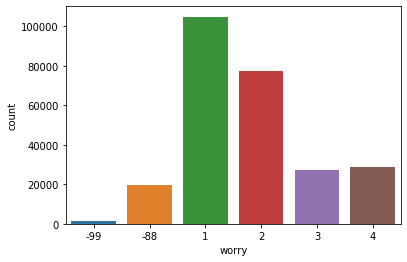

In [107]:
sns.countplot(data["worry"]);

In [38]:
pd.crosstab(data.eeduc,data.down)

down      0      1      2     3     4
eeduc                                
1      252   527    415    194   261 
2      634   1231   1157   458   527 
3      3277  12308  8417   3222  3208
4      5036  22595  16492  5756  5962
5      2222  11793  7981   2634  2516
6      5409  35801  22396  5814  5389
7      4063  33492  19408  4295  3785

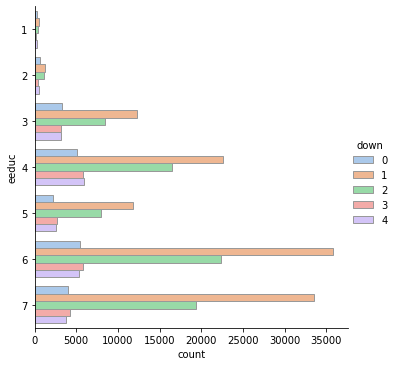

In [39]:
sns.catplot(y="eeduc", hue="down", kind="count",
            palette="pastel", edgecolor=".6",
            data=data);

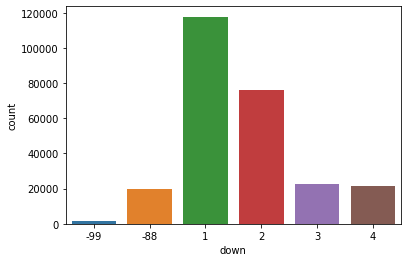

In [108]:
sns.countplot(data["down"]);

In [125]:
data["down"].value_counts()

 1     117747
 2     76266 
 3     22373 
 4     21648 
-88    19557 
-99    1336  
Name: down, dtype: int64

In [21]:
data["rrace"].value_counts()

1    213214
2    21254 
4    12746 
3    11713 
Name: rrace, dtype: int64

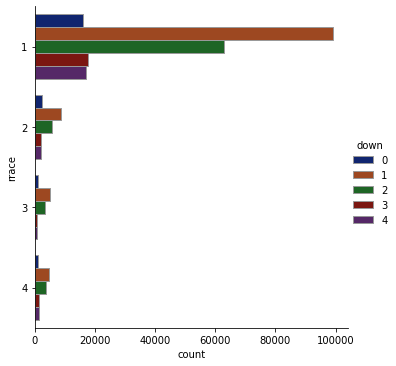

In [20]:
sns.catplot(y="rrace", hue="down", kind="count",
            palette="dark", edgecolor=".6",
            data=data);

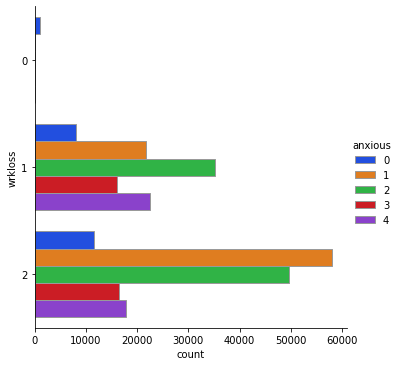

In [23]:
sns.catplot(y="wrkloss", hue="anxious", kind="count",
            palette="bright", edgecolor=".6",
            data=data);
# 1 is recent household job loss and 2 is no job loss

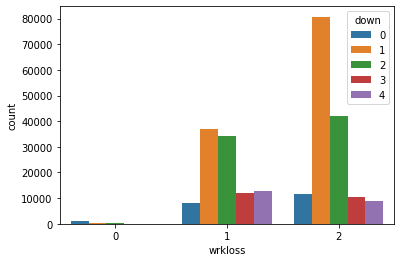

In [24]:
ax = sns.countplot(x="wrkloss", hue="down", data=data)

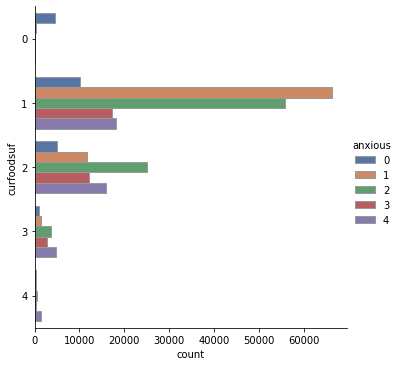

In [25]:
sns.catplot(y="curfoodsuf", hue="anxious", kind="count",
            palette="deep", edgecolor=".6",
            data=data);
# household food sufficiency for last 7 days
# 1 and 2 is enough
# 3 is sometimes not enough and 4 is not enough to eat

In [27]:
data["childfood"].value_counts()

0    224096
3    24672 
2    8326  
1    1833  
Name: childfood, dtype: int64

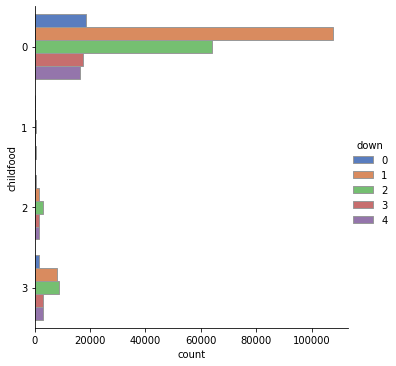

In [26]:
sns.catplot(y="childfood", hue="down", kind="count",
            palette="muted", edgecolor=".6",
            data=data);
# child not eating enough
# 0 is NA, 1 often true, 2 sometimes, 3 never true

In [29]:
data["foodconf"].value_counts()

4    130670
3    49890 
2    45097 
0    17219 
1    16051 
Name: foodconf, dtype: int64

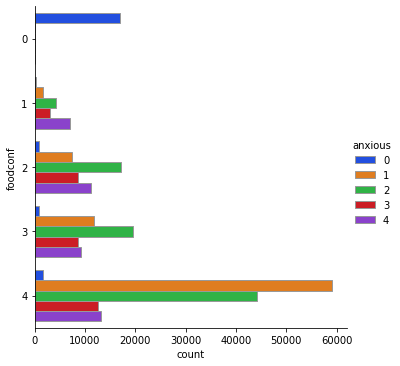

In [28]:
sns.catplot(y="foodconf", hue="anxious", kind="count",
            palette="bright", edgecolor=".6",
            data=data);
# food sufficiency confidence for next 4 weeks
# 0 NA, 1 not at all confident, 2 somewhat, 3 moderately confident, 4 very conf

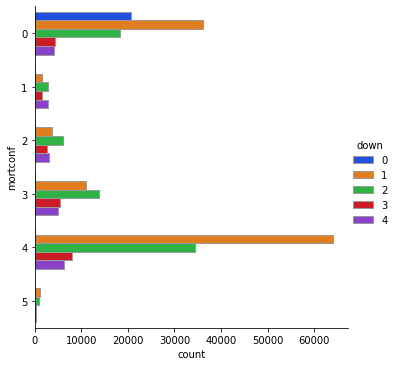

In [30]:
sns.catplot(y="mortconf", hue="down", kind="count",
            palette="bright", edgecolor=".6",
            data=data);
# confident in ability to pay mortgage or rent next month
# 0 NA, 1 no confidence, 2 slight confidence, 3 moderate, 4 high, 5 payment is deferred


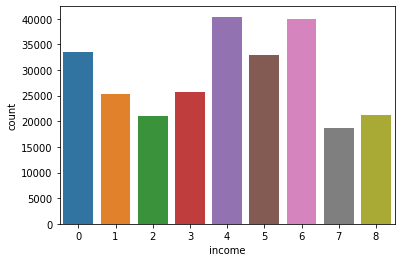

In [31]:
sns.countplot(data["income"]);
# 0 not reported (bias)
# 1 less than $25,000
# 2 25000-34999
# 3 35000-49999
# 4 50000-74999
# 5 75000-99999
# 6 100000-149999
# 7 150000-199999
# 8 200000 and above

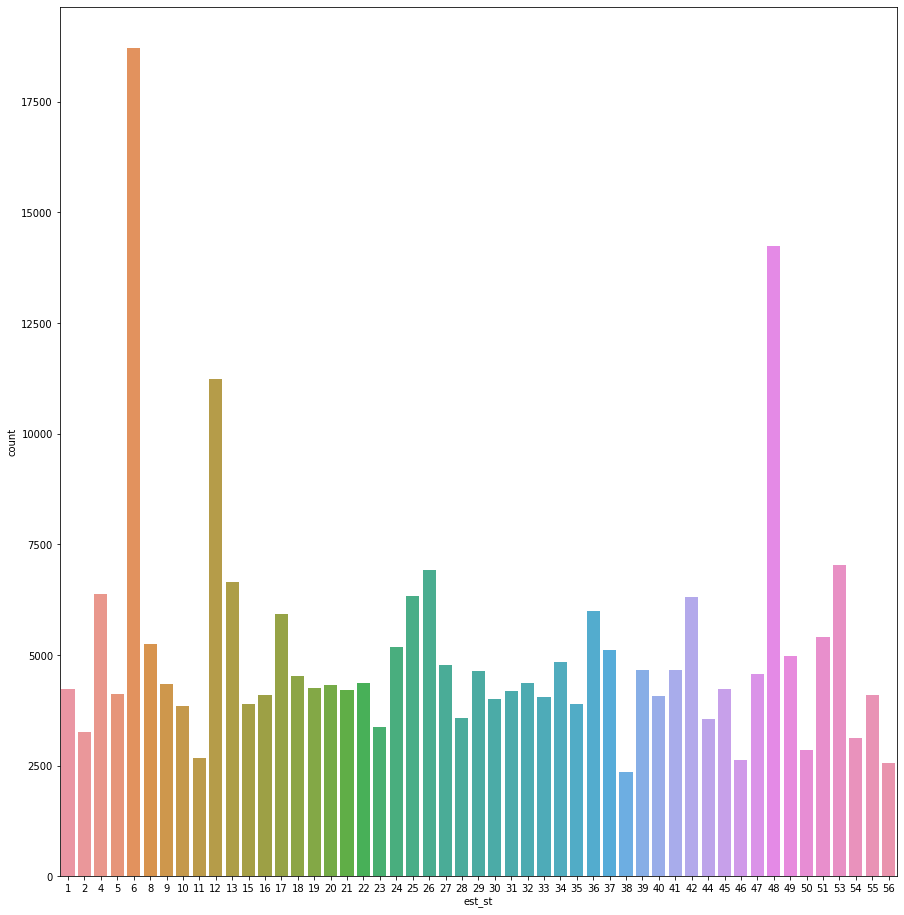

In [42]:
plt.figure(figsize=(15,16))
sns.countplot(data["est_st"]);
# states
# 6 is CA
# 12 is FL

In [32]:
#data=pd.concat([data,pd.get_dummies(data["foodsufrsn1"],prefix="foodsufrsn1")],axis=1).drop(["foodsufrsn1"],axis=1)
# one way to one hot encode, just doing one column
# label encoding to be used for ordinal or high cardinality nominal instead on one hot

In [33]:
data = pd.concat([data,pd.get_dummies(data["egender"],prefix="egender")],axis=1).drop(["egender"],axis=1)

In [34]:
data = pd.concat([data,pd.get_dummies(data["rhispanic"],prefix="rhispanic")],axis=1).drop(["rhispanic"],axis=1)

In [36]:
data = pd.concat([data,pd.get_dummies(data["rrace"],prefix="rrace")],axis=1).drop(["rrace"],axis=1)

In [37]:
data = pd.concat([data,pd.get_dummies(data["ms"],prefix="ms")],axis=1).drop(["ms"],axis=1)

In [38]:
data = pd.concat([data,pd.get_dummies(data["thhld_numper"],prefix="thhld_numper")],axis=1).drop(["thhld_numper"],axis=1)

In [39]:
data = pd.concat([data,pd.get_dummies(data["thhld_numkid"],prefix="thhld_numkid")],axis=1).drop(["thhld_numkid"],axis=1)

In [40]:
data = pd.concat([data,pd.get_dummies(data["wrkloss"],prefix="wrkloss")],axis=1).drop(["wrkloss"],axis=1)

In [41]:
data = pd.concat([data,pd.get_dummies(data["expctloss"],prefix="expctloss")],axis=1).drop(["expctloss"],axis=1)

In [42]:
data = pd.concat([data,pd.get_dummies(data["eip"],prefix="eip")],axis=1).drop(["eip"],axis=1)

In [43]:
data = pd.concat([data,pd.get_dummies(data["anywork"],prefix="anywork")],axis=1).drop(["anywork"],axis=1)

In [44]:
data = pd.concat([data,pd.get_dummies(data["rsnnowrk"],prefix="rsnnowrk")],axis=1).drop(["rsnnowrk"],axis=1)

In [45]:
data = pd.concat([data,pd.get_dummies(data["unemppay"],prefix="unemppay")],axis=1).drop(["unemppay"],axis=1)

In [46]:
data = pd.concat([data,pd.get_dummies(data["mortlmth"],prefix="mortlmth")],axis=1).drop(["mortlmth"],axis=1)

In [47]:
data = pd.concat([data,pd.get_dummies(data["tenure"],prefix="tenure")],axis=1).drop(["tenure"],axis=1)

In [48]:
data = pd.concat([data,pd.get_dummies(data["delay"],prefix="delay")],axis=1).drop(["delay"],axis=1)

In [49]:
data = pd.concat([data,pd.get_dummies(data["freefood"],prefix="freefood")],axis=1).drop(["freefood"],axis=1)

In [50]:
data.head()

eeduc  curfoodsuf  childfood  tspndfood  tspndprpd  foodconf  hlthstatus  \
0  7      2           0          500        100        2         2            
1  6      1           0          100        75         4         3            
2  7      1           0          300        200        4         3            
3  6      2           0          204        15         2         3            
4  6      1           0          125        0          4         3            

   anxious  worry  interest  down  mortconf  compavail  intrntavail  tschlhrs  \
0  2        2      2         1     0         0          0            0.0        
1  1        1      1         2     4         0          0            0.0        
2  4        4      4         4     4         0          0            0.0        
3  1        1      1         1     4         0          0            0.0        
4  1        1      1         1     0         0          0            0.0        

   tstdy_hrs  ttch_hrs  income age_range  egender_1  egender_2  rhispanic_1  \
0  0.0        0.0       5       25-35     1          0          1             
1  0.0        0.0       3       35-45     0          1          1             
2  0.0        0.0       8       25-35     1          0          1             
3  0.0        0.0       4       65+       0          1          1             
4  0.0        0.0       5       65+       1          0          1             

   rhispanic_2  rrace_1  rrace_2  rrace_3  rrace_4  ms_0  ms_1  ms_2  ms_3  \
0  0            1        0        0        0        0     0     0     0      
1  0            1        0        0        0        0     1     0     0      
2  0            1        0        0        0        0     0     0     0      
3  0            1        0        0        0        0     0     0     1      
4  0            1        0        0        0        0     0     0     0      

   ms_4  ms_5  thhld_numper_1  thhld_numper_2  thhld_numper_3  thhld_numper_4  \
0  0     1     0               1               0               0                
1  0     0     0               0               0               1                
2  0     1     0               1               0               0                
3  0     0     1               0               0               0                
4  0     1     1               0               0               0                

   thhld_numper_5  thhld_numper_6  thhld_numper_7  thhld_numper_8  \
0  0               0               0               0                
1  0               0               0               0                
2  0               0               0               0                
3  0               0               0               0                
4  0               0               0               0                

   thhld_numper_9  thhld_numper_10  thhld_numkid_0  thhld_numkid_1  \
0  0               0                1               0                
1  0               0                0               0                
2  0               0                1               0                
3  0               0                1               0                
4  0               0                1               0                

   thhld_numkid_2  thhld_numkid_3  thhld_numkid_4  thhld_numkid_5  wrkloss_0  \
0  0               0               0               0               0           
1  1               0               0               0               0           
2  0               0               0               0               0           
3  0               0               0               0               0           
4  0               0               0               0               0           

   wrkloss_1  wrkloss_2  expctloss_0  expctloss_1  expctloss_2  eip_0  eip_1  \
0  0          1          0            1            0            0      1       
1  0          1          0            0            1            0      0       
2  0          1          0            0            1 

In [51]:
data.shape

(258927, 97)

In [26]:
#def one_hot(data, cols):
    """
    @param data pandas DataFrame
    @param cols a list of columns to encode 
    @return a DataFrame with one-hot encoding
    """
    #for each in cols:
        #dummies = pd.get_dummies(data[each], prefix=each, drop_first=False)
        #data = pd.concat([data, dummies], axis=1)
    #return data
# function for one hot encoding multiple columns

In [27]:
#cols = data[["egender","rhispanic", "rrace", "ms", "thhld_numper", 
            #"thhld_numkid", "wrkloss", "expctloss", "eip", 
            #"anywork", "rsnnowrk", "unemppay", "mortlmth", "tenure",
            #"delay", "freefood"]]

In [52]:
#one_hot(data, cols)

In [ ]:
#data.head(10)

In [53]:
data["tspndfood"]=((data["tspndfood"]-data["tspndfood"].min())/
                        (data["tspndfood"].max()-data["tspndfood"].min()))*20
# standardize continuous interger variables

In [54]:
data["tspndprpd"]=((data["tspndprpd"]-data["tspndprpd"].min())/
                        (data["tspndprpd"].max()-data["tspndprpd"].min()))*20

In [55]:
data["tschlhrs"]=((data["tschlhrs"]-data["tschlhrs"].min())/
                        (data["tschlhrs"].max()-data["tschlhrs"].min()))*20

In [56]:
data["tstdy_hrs"]=((data["tstdy_hrs"]-data["tstdy_hrs"].min())/
                        (data["tstdy_hrs"].max()-data["tstdy_hrs"].min()))*20

In [57]:
data["ttch_hrs"]=((data["ttch_hrs"]-data["ttch_hrs"].min())/
                        (data["ttch_hrs"].max()-data["ttch_hrs"].min()))*20

In [58]:
data.to_csv("one_hot.csv")
# save one hot data frame in a csv
# this can be pulled into AWS for the model(s)